In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import phone_info as ph_i 
from phonetics import plots as plots
import numpy as np

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v2/feat_2d'
feat_path = f'{experiment_path}/feat_2d_layer_12.csv'

In [25]:
df_proj_an_all = pd.read_csv(feat_path, index_col=0)

df_proj_ref = df_proj_an_all.copy()
df_proj_ref['y'] = -df_proj_an_all['y'] +10 
df_proj_ref['x'] = df_proj_an_all['x'] +2.5

c1 = df_proj_ref['phone_base'] != 'SP'
c2 = np.sqrt(df_proj_ref['x']**2 + df_proj_ref['y']**2) > 2.5

c3 = (df_proj_ref['x'] < 19) & (df_proj_ref['x'] > 0)
c4 = (df_proj_ref['y'] < 18) & (df_proj_ref['y'] > 0) 

df_song = df_proj_ref[c1 & c2 & c3 & c4].copy()

Making a 2d plot


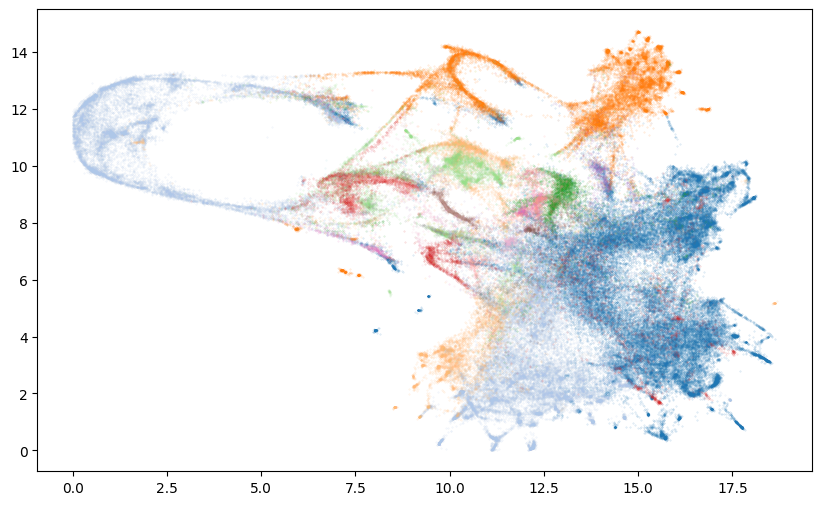

In [26]:
unique_phones = [k for k in df_song['phone_base'].value_counts().keys() ]

plots.make_tagged_LS_plot(df_song,
            phones = unique_phones,
            alpha = 0.25, 
            s = 0.1,
            show_global=False,
            add_legend = False)
            # xlim = [ -2.5, 19],
            # ylim = [-2, 18])

In [15]:
#df_song.to_csv('LS_2d_clean.csv')

In [27]:
df_song['lang'] = df_song['song'].str.split('_', expand=True)[0]

Making a 2d plot


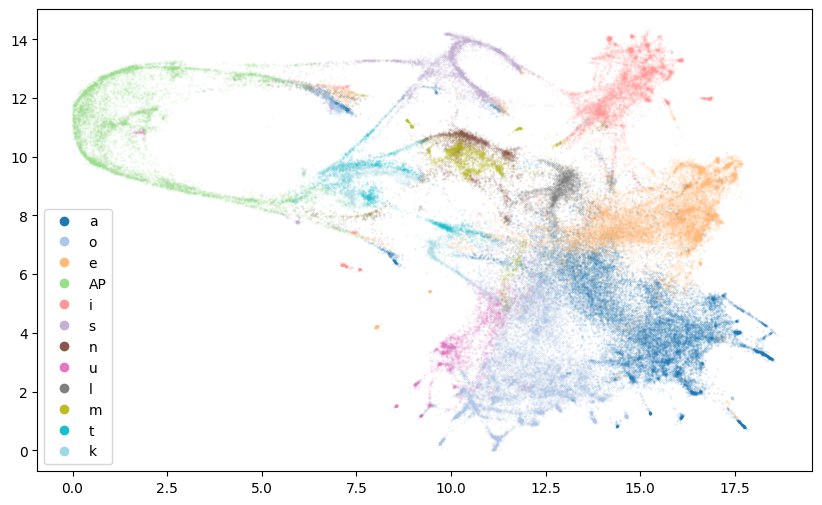

In [33]:
df_es = df_song[df_song['lang'] == 'ES']
unique_phones = [k for k in df_es['phone_base'].value_counts().keys() ]

plots.make_tagged_LS_plot(df_es,
            phones = unique_phones[0:12],
            alpha = 0.25, 
            s = 0.1,
            show_global=False,
            add_legend = True)

Making a 2d plot


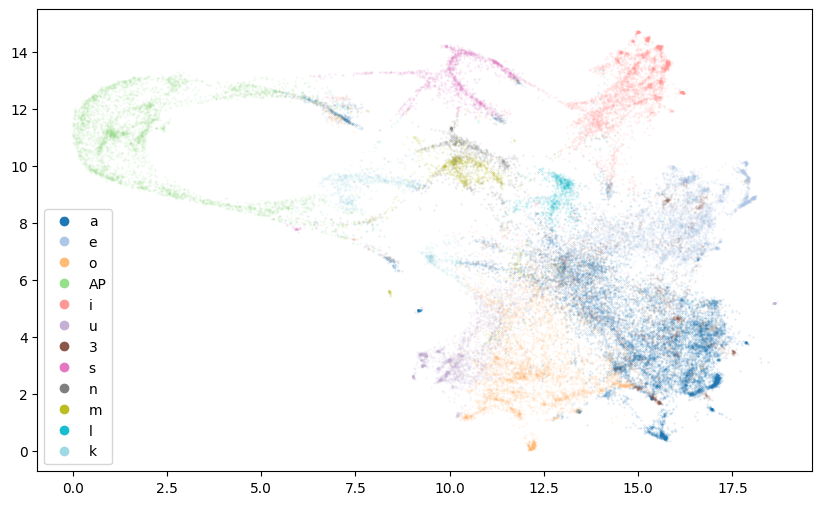

In [34]:
df_ca = df_song[df_song['lang'] == 'CA']
unique_phones = [k for k in df_ca['phone_base'].value_counts().keys() ]

plots.make_tagged_LS_plot(df_ca,
            phones = unique_phones[0:12],
            alpha = 0.25, 
            s = 0.1,
            show_global=False,
            add_legend = True)